# Healthcare Stroke Prediction

## Data Preparation

In [33]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import scipy.stats as st

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [34]:
df = pd.read_csv('Dataset/stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Descriptive Statistic

#### Data Type

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Check Duplicated Data

In [36]:
df.duplicated().any()

False

#### Check Null Data

In [37]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Describe data

In [38]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Pengamatan\:

A. `Semua tipe data sesuai dan tidak ada duplikasi data`

B. `Hampir Semua kolom tidak memiliki null/missing values kecuali pada kolom BMI`

### Univariate Analysis

In [39]:
# Pengelompokan kolom berdasarkan jenisnya
numericals = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
categoricals = ['gender','ever_married','work_type','Residence_type', 'smoking_status']

In [40]:
# kolom numerik
df[numericals].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


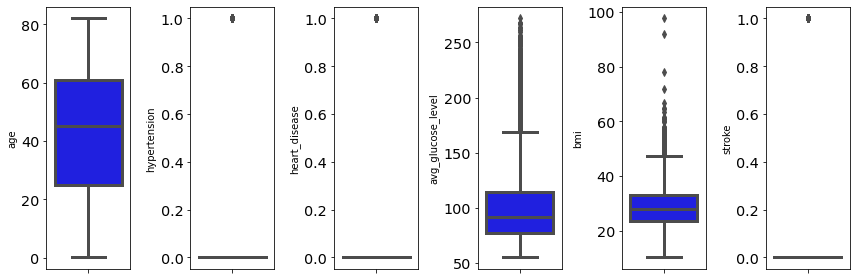

In [41]:
# Individual Boxplot (Numerical)
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue', orient='v')
    plt.tight_layout()

Boxplot:

* Kolom Age terlihat normal
* Selain kolom Age, hampir semua kolom memiliki outlier

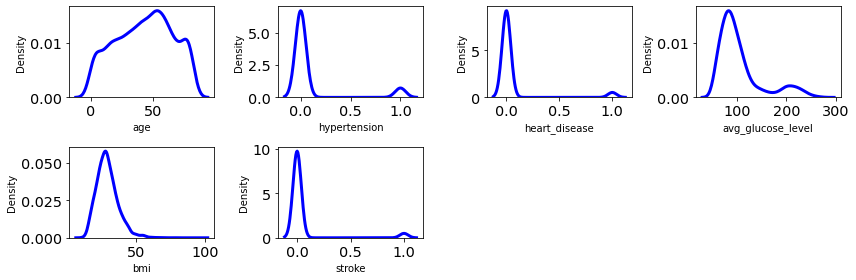

In [42]:
# Individual Distplot (Numerical)
features = numericals
for i in range (0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

Distribution plot:
* Tidak ada satupun kolom yang mendekati distribusi normal
* Hampir semua kolom kecuali age terlihat skewed
* Berarti ada kemungkinan kita perlu melakukan sesuatu pada kolom2 tersebut nantinya

In [43]:
# kolom kategori
df[categoricals].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


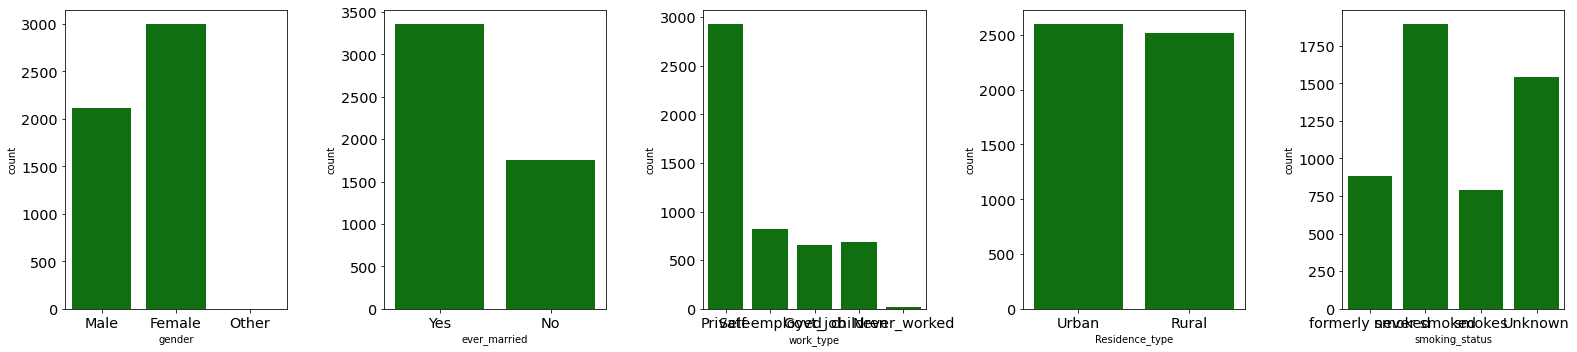

In [46]:
# Individual Countplot (Categorical)
features = categoricals
for i in range(0, len(features)):
    ax = plt.subplot(1, 
                len(features),
                i+1)
    sns.countplot(x=df[features[i]], color='green')
    plt.tight_layout()
plt.rcParams["figure.figsize"] = (22,5)

Pengamatan:
1. Data lebih banyak gender wanita dibanding pria dan lainnya
2. Tipe Residen Urban dan Rural memiliki data yang hampir sama

### Multivariate Analysis

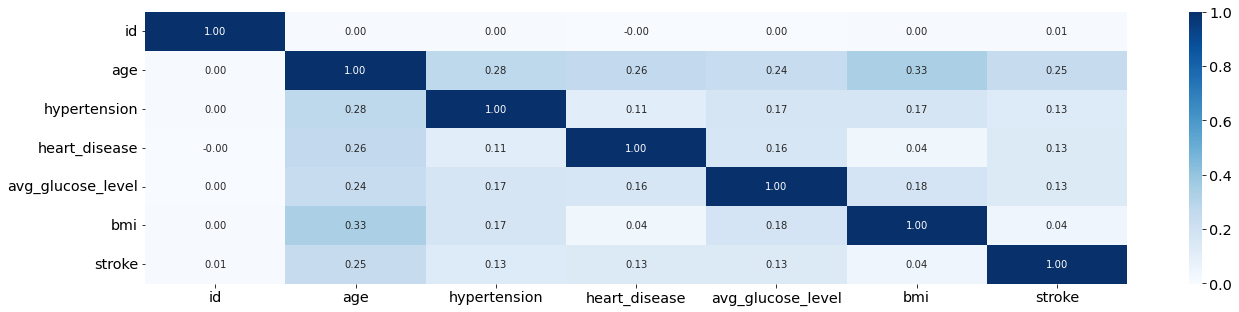

In [45]:
# Hubungan korelasi
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f');

Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Target kita `Stroke` memiliki korelasi positif kuat dengan `Age`
* Terdapat beberepa korelasi positif lemah